# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url =  "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vadso
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | pudozh
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | filey
Processing Record 11 of Set 1 | howrah
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | colonia
Processing Record 14 of Set 1 | ak-dovurak
Processing Record 15 of Set 1 | sosnytsya
Processing Record 16 of Set 1 | umm kaddadah
Processing Record 17 of Set 1 | santa elena de uairen
Processing Record 18 of Set 1 | saint-pierre
Processing Record 19 of Set 1 | luanda
Processing Record 20 of Set 1 | nsanje
Processing Record 21 of Set 1 | midvagur
Processing Record 22 of Set 1 | khant

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vadso,70.0744,29.7487,-4.91,93,40,5.14,NO,1699832875
1,pudozh,61.8099,36.5345,2.75,98,100,2.68,RU,1699833064
2,port-aux-francais,-49.3500,70.2167,4.86,83,100,5.48,TF,1699832863
3,puerto ayora,-0.7393,-90.3518,24.75,90,45,1.79,EC,1699832837
4,papatowai,-46.5619,169.4708,12.60,94,100,0.81,NZ,1699832866


In [95]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [96]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vadso,70.0744,29.7487,-4.91,93,40,5.14,NO,1699832875
1,pudozh,61.8099,36.5345,2.75,98,100,2.68,RU,1699833064
2,port-aux-francais,-49.3500,70.2167,4.86,83,100,5.48,TF,1699832863
3,puerto ayora,-0.7393,-90.3518,24.75,90,45,1.79,EC,1699832837
4,papatowai,-46.5619,169.4708,12.60,94,100,0.81,NZ,1699832866


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

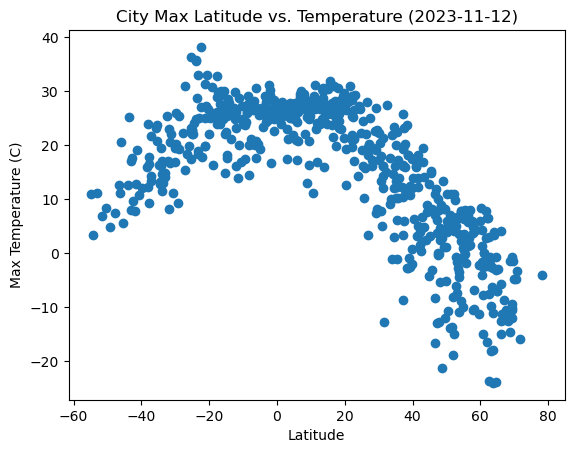

In [17]:
# Build scatter plot for latitude vs. temperature
import datetime
dt_object = datetime.datetime.fromtimestamp(int(city_data_df['Date'][0]))
formatted_date = dt_object.strftime("%Y-%m-%d")

plt.scatter(x=city_data_df["Lat"], y=city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature ({})".format(formatted_date))
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

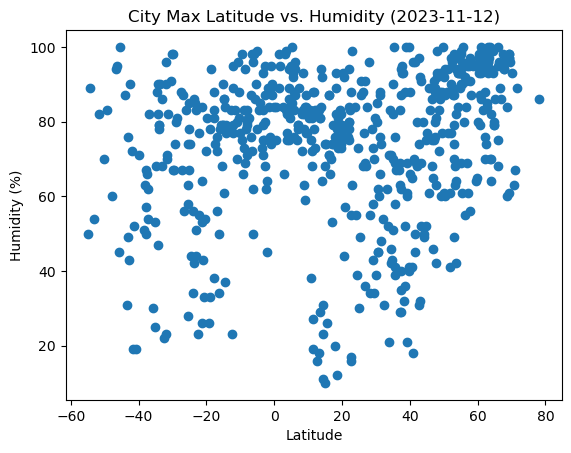

In [18]:
# Build the scatter plots for latitude vs. humidity
import datetime
dt_object = datetime.datetime.fromtimestamp(int(city_data_df['Date'][0]))
formatted_date = dt_object.strftime("%Y-%m-%d")

plt.scatter(x=city_data_df["Lat"], y=city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity ({})".format(formatted_date))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

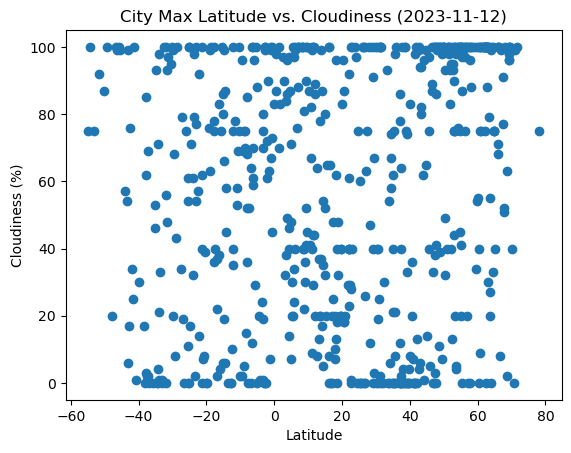

In [19]:
# Build the scatter plots for latitude vs. cloudiness
import datetime
dt_object = datetime.datetime.fromtimestamp(int(city_data_df['Date'][0]))
formatted_date = dt_object.strftime("%Y-%m-%d")

plt.scatter(x=city_data_df["Lat"], y=city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs. Cloudiness ({})".format(formatted_date))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

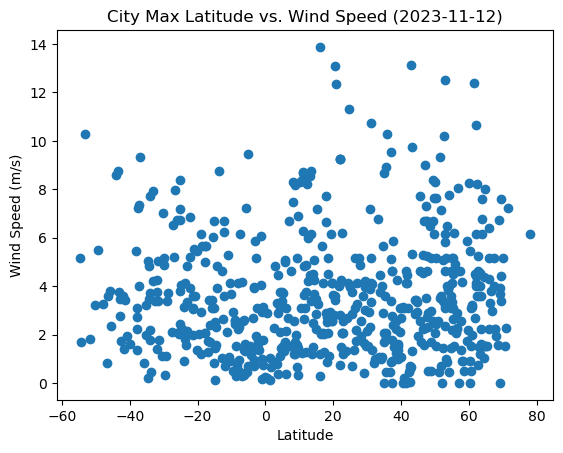

In [21]:
# Build the scatter plots for latitude vs. wind speed
import datetime
dt_object = datetime.datetime.fromtimestamp(int(city_data_df['Date'][0]))
formatted_date = dt_object.strftime("%Y-%m-%d")

plt.scatter(x=city_data_df["Lat"], y=city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind Speed ({})".format(formatted_date))

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [86]:
# Define a function to create Linear Regression plots
def linear_regression_plots(df, x_col, y_col):
    x_values = df[x_col]
    y_values = df[y_col]

    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values,y_values)

    mid_x = np.mean(x_values)
    mid_y = mid_x * slope + intercept
    offset = (max(y_values) - min(y_values)) * 0.2
    annot_y_pos = mid_y - offset
    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(mid_x,  annot_y_pos),fontsize=15,color="red")

    #Label Plot
    if (x_col == "Lat") :
        x_col = "Latitude"
    if (x_col == "Lng") :
        x_col = "Longitude"    
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    
    #Print R square value
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vadso,70.0744,29.7487,-4.91,93,40,5.14,NO,1699832875
1,pudozh,61.8099,36.5345,2.75,98,100,2.68,RU,1699833064
5,olonkinbyen,70.9221,-8.7187,-3.36,67,99,2.25,SJ,1699833068
6,tiksi,71.6872,128.8694,-16.03,89,100,7.21,RU,1699832826
7,isafjordur,66.0755,-23.1240,4.13,75,100,5.16,IS,1699833070


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,4.86,83,100,5.48,TF,1699832863
3,puerto ayora,-0.7393,-90.3518,24.75,90,45,1.79,EC,1699832837
4,papatowai,-46.5619,169.4708,12.60,94,100,0.81,NZ,1699832866
16,saint-pierre,-21.3393,55.4781,19.82,64,0,3.60,RE,1699833077
17,luanda,-8.8368,13.2343,26.00,83,75,2.57,AO,1699832953


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7341300416815474


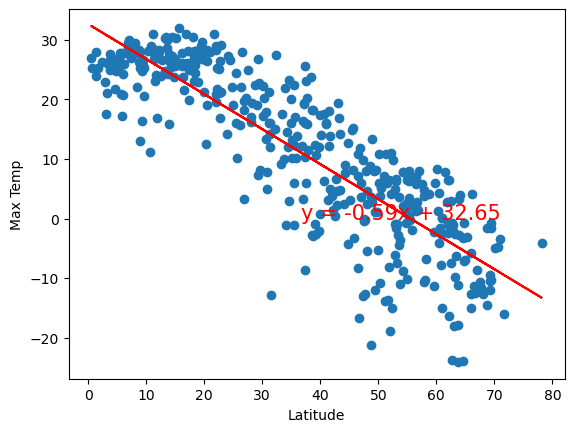

In [87]:
# Linear regression on Northern Hemisphere
linear_regression_plots(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.39227260861326274


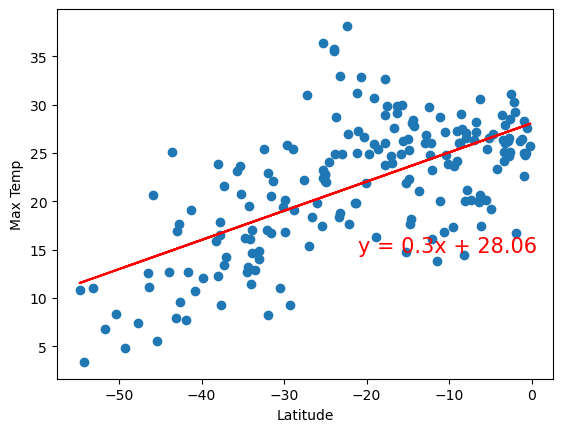

In [88]:
# Linear regression on Southern Hemisphere
linear_regression_plots(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** 
Northern Hemisphere (r-value ~ 0.73):
Stronger Positive Correlation: The higher r-value in the Northern Hemisphere indicates a stronger linear relationship between latitude and maximum temperature. As you move away from the equator towards the north, temperatures tend to decrease more predictably.

Southern Hemisphere (r-value ~ 0.39):
Weaker Positive Correlation: The lower r-value indicates a weaker correlation between latitude and maximum temperature. This suggests that other factors may have a more significant impact on temperature variations.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.041842194023445405


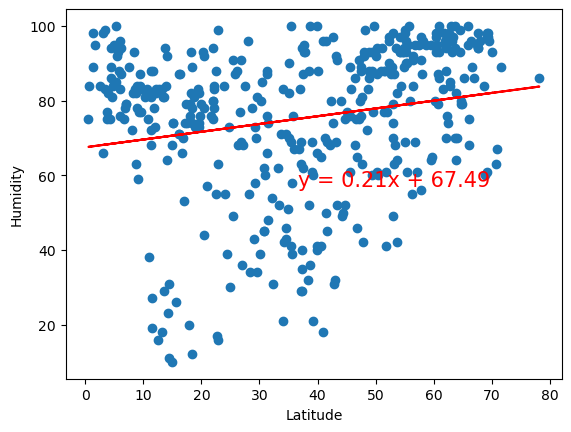

In [89]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df, "Lat", "Humidity")

The r-value is: 0.07239089155314962


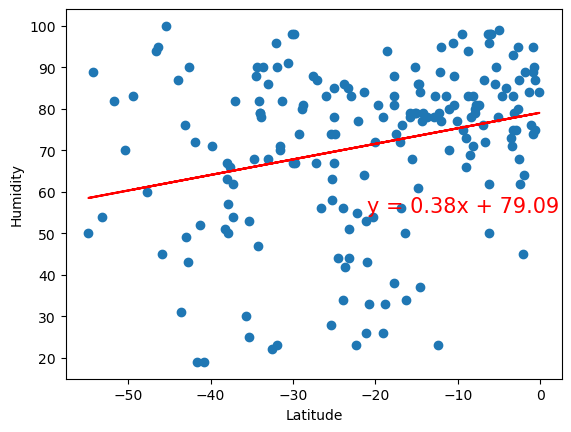

In [90]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df, "Lat", "Humidity")

**Discussion about the linear relationship:** 
Northern Hemisphere (r-value ~ 0.0418):
Very Weak Correlation: The r-value close to zero indicates a very weak linear relationship between latitude and humidity in the Northern Hemisphere. This suggests that as one moves away from the equator towards the north, changes in humidity are not strongly tied to changes in latitude.

Southern Hemisphere (r-value ~ 0.0724):
Slightly Stronger, Yet Still Weak Correlation: Although slightly higher than in the Northern Hemisphere, the r-value in the Southern Hemisphere still indicates a very weak relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.035067217890116825


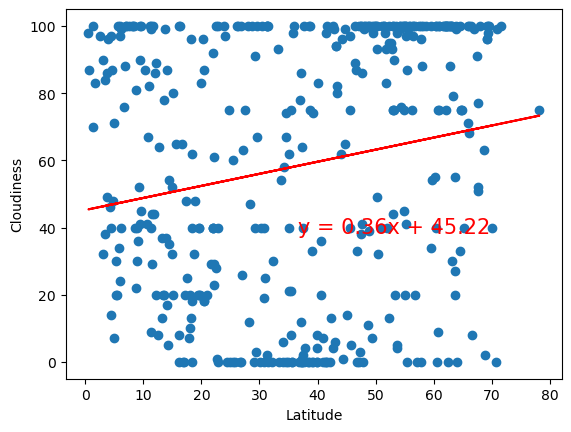

In [91]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df, "Lat", "Cloudiness")

The r-value is: 7.013124076429597e-07


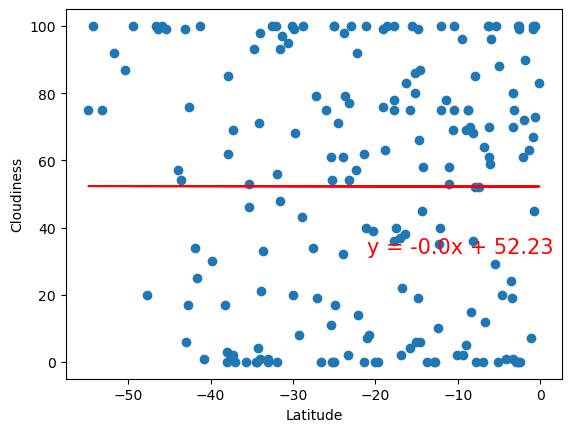

In [92]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df, "Lat", "Cloudiness")

**Discussion about the linear relationship:** 
Northern Hemisphere (r-value ~ 0.0351):
Very Weak Positive Correlation: The r-value near zero indicates that there is a very weak correlation between latitude and cloudiness in the Northern Hemisphere. This implies that as you move northward from the equator, changes in latitude do not significantly predict changes in cloudiness. 

Southern Hemisphere (r-value ~ 7.01e-07):
No Significant Correlation: The extremely low r-value in the Southern Hemisphere suggests that there is virtually no linear correlation between latitude and cloudiness. This means that latitude is not a reliable predictor of cloudiness in this hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.002691245312033726


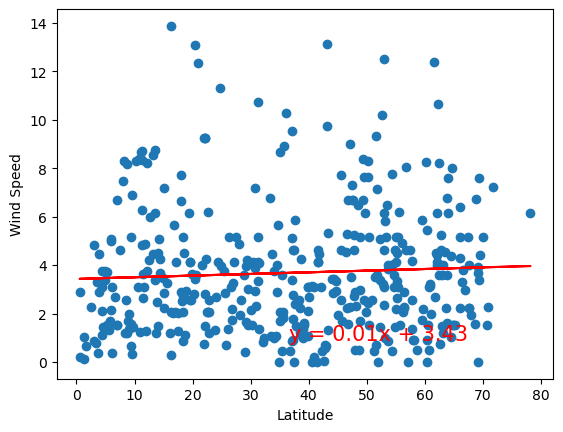

In [93]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df, "Lat", "Wind Speed")

The r-value is: 0.0642631035665925


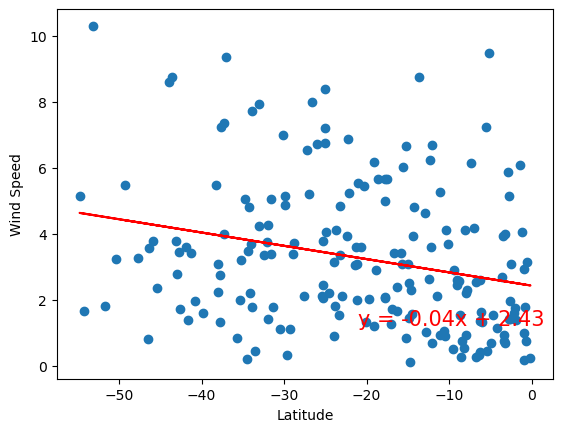

In [94]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df, "Lat", "Wind Speed")

**Discussion about the linear relationship:** 
Northern Hemisphere (r-value ~ 0.0027):
Negligible Correlation: The r-value near zero suggests that in the Northern Hemisphere, there is virtually no linear relationship between latitude and wind speed. This indicates that as one moves away from the equator towards the north, changes in latitude do not significantly predict changes in wind speed.

Southern Hemisphere (r-value ~ 0.0643):
Weak Positive Correlation: The slightly higher r-value in the Southern Hemisphere suggests a weak correlation between latitude and wind speed. This indicates that there might be a slight tendency for wind speeds to change with latitude, but the relationship is not strong.
